In [1]:
# Define the file path
import pandas as pd

In [2]:
file_path = 'datasets/PDA - Zappy Loan Data.xlsx'

In [3]:
# Load the dataset into a Pandas DataFrame
df = pd.read_excel(file_path)
df

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
243,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
244,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
245,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y


In [4]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [5]:
# Map integer values to their corresponding categories
gender_mapping = {1: 'Male', 2: 'Female'}
married_mapping = {0: 'Single', 1: 'Married'}
dependents_mapping = {0: '0', 1: '1', 2: '2', 3: '3+'}
graduate_mapping = {0: 'No', 1: 'Yes'}
self_employed_mapping = {0: 'No', 1: 'Yes'}
credit_history_mapping = {0: 'No', 1: 'Yes'}
property_area_mapping = {1: 'Urban', 2: 'Semiurban', 3: 'Rural'}

In [6]:
# Apply mappings to the DataFrame
df['Gender'] = df['Gender'].map(gender_mapping)
df['Married'] = df['Married'].map(married_mapping)
df['Dependents'] = df['Dependents'].map(dependents_mapping)
df['Graduate'] = df['Graduate'].map(graduate_mapping)
df['Self_Employed'] = df['Self_Employed'].map(self_employed_mapping)
df['Credit_History'] = df['Credit_History'].map(credit_history_mapping)
df['Property_Area'] = df['Property_Area'].map(property_area_mapping)

In [7]:
# Display the modified DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,Male,Single,0,No,No,3902,1666.0,109,333,Yes,Rural,Y
1,2287,Female,Single,0,Yes,No,1500,1800.0,103,333,No,Semiurban,N
2,2288,Male,Married,2,No,No,2889,0.0,45,180,No,Urban,N
3,2296,Male,Single,0,No,No,2755,0.0,65,300,Yes,Rural,N
4,2297,Male,Single,0,Yes,No,2500,20000.0,103,333,Yes,Semiurban,Y


In [8]:
# Save the modified DataFrame to a new CSV file if needed
df.to_csv('Modified_Zappy_Loan_Data.csv', index=False)

In [9]:
# Check for duplicate Loan IDs
duplicates = df.duplicated(subset=['Loan_ID'])
print("Number of duplicate Loan IDs:", duplicates.sum())

Number of duplicate Loan IDs: 0


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [11]:
# Handle missing values (you may choose different strategies based on your analysis)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [12]:
# Descriptive Analysis
# Total amount loaned by ZFS
total_loan_amount = df['LoanAmount'].sum()
print("Total amount loaned by ZFS:", total_loan_amount)

Total amount loaned by ZFS: 37699


In [13]:
# Average amount loaned
average_loan_amount = df['LoanAmount'].mean()
print("Average amount loaned:", average_loan_amount)

Average amount loaned: 152.62753036437246


In [14]:
# Average loan term
average_loan_term = df['Loan_Amount_Term'].mean()
print("Average loan term:", average_loan_term)

Average loan term: 320.0404858299595


In [15]:
# Total number of applicants broken down into Approved and Rejected
applicant_status_counts = df['Loan_Status'].value_counts()
print("Number of Approved and Rejected applicants:\n", applicant_status_counts)

Number of Approved and Rejected applicants:
 Y    167
N     80
Name: Loan_Status, dtype: int64


In [16]:
# Number of males and females in each case
gender_counts = df.groupby(['Loan_Status', 'Gender'])['Gender'].count().unstack()
print("Number of males and females in each case:\n", gender_counts)

Number of males and females in each case:
 Gender       Female  Male
Loan_Status              
N                16    64
Y                33   134


In [17]:
# Visualize the above information in a bar chart
import matplotlib.pyplot as plt

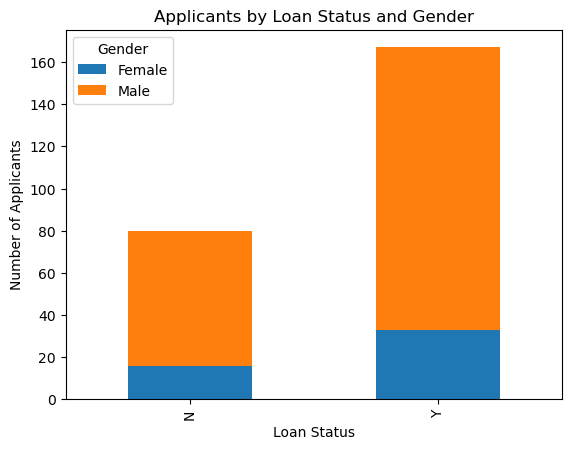

In [18]:
gender_counts.plot(kind='bar', stacked=True)
plt.title('Applicants by Loan Status and Gender')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applicants')
plt.legend(title='Gender')
plt.show()

In [19]:
# Maximum and minimum loan amounts
max_loan_amount = df['LoanAmount'].max()
min_loan_amount = df['LoanAmount'].min()
print("Maximum loan amount:", max_loan_amount)
print("Minimum loan amount:", min_loan_amount)

Maximum loan amount: 600
Minimum loan amount: 9


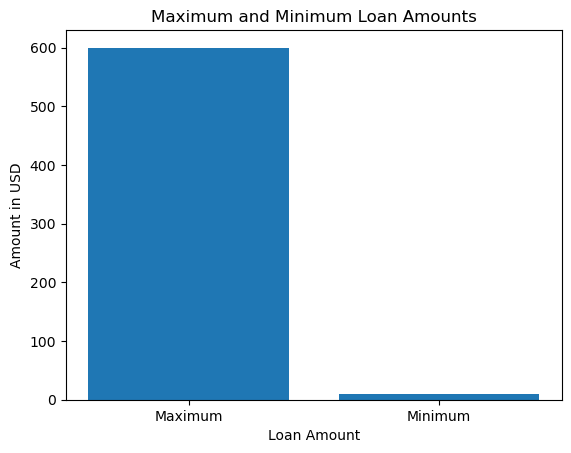

In [20]:
# Visualize the maximum and minimum loan amounts
plt.bar(['Maximum', 'Minimum'], [max_loan_amount, min_loan_amount])
plt.title('Maximum and Minimum Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Amount in USD')
plt.show()

In [21]:
# Number of self-employed who had their loan approved
self_employed_approved = df[df['Loan_Status'] == 'Y']['Self_Employed'].value_counts()
self_employed_percentage = (self_employed_approved / self_employed_approved.sum()) * 100
print("Percentage of self-employed who had their loan approved:\n", self_employed_percentage)

Percentage of self-employed who had their loan approved:
 No     86.227545
Yes    13.772455
Name: Self_Employed, dtype: float64


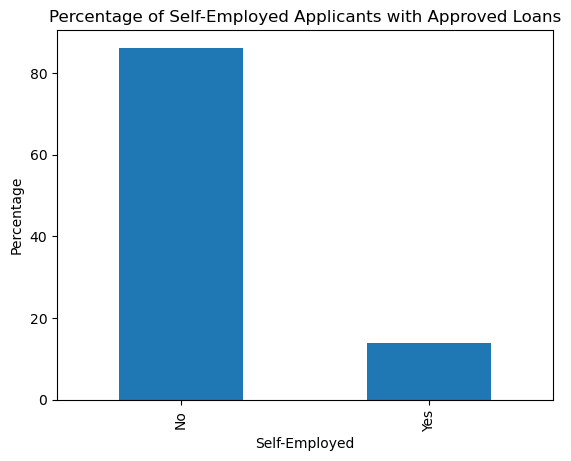

In [22]:
# Visualize the percentage of self-employed who had their loan approved
self_employed_percentage.plot(kind='bar')
plt.title('Percentage of Self-Employed Applicants with Approved Loans')
plt.xlabel('Self-Employed')
plt.ylabel('Percentage')
plt.show()